In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8321 - loss: 0.5609 - val_accuracy: 0.9525 - val_loss: 0.1565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.9552 - loss: 0.1536 - val_accuracy: 0.9637 - val_loss: 0.1133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9663 - loss: 0.1128 - val_accuracy: 0.9704 - val_loss: 0.0968
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9730 - loss: 0.0893 - val_accuracy: 0.9719 - val_loss: 0.0880
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9733 - val_loss: 0.0878


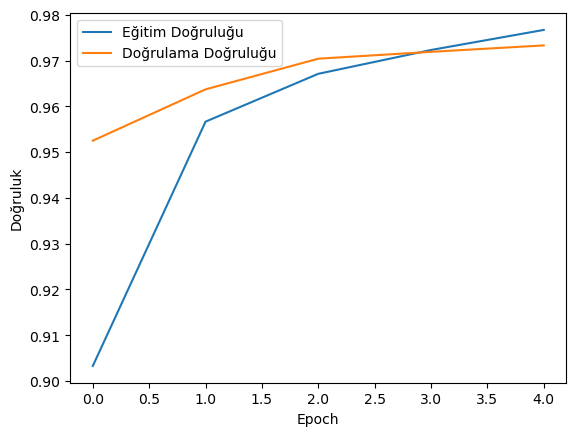

In [31]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 0s - 680us/step - accuracy: 0.9733 - loss: 0.0878

Test doğruluğu: 0.9732999801635742


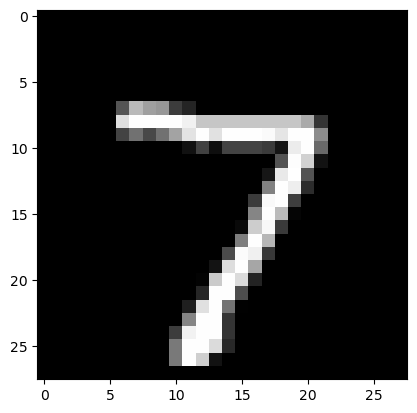

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Tahmin Edilen Etiket: 7


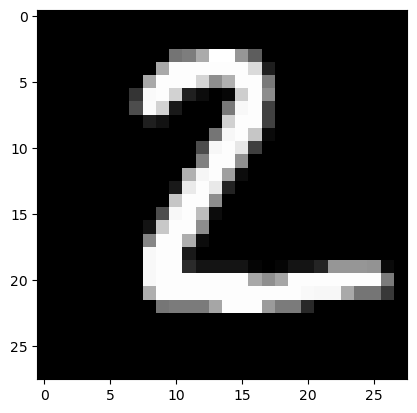

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Tahmin Edilen Etiket: 2


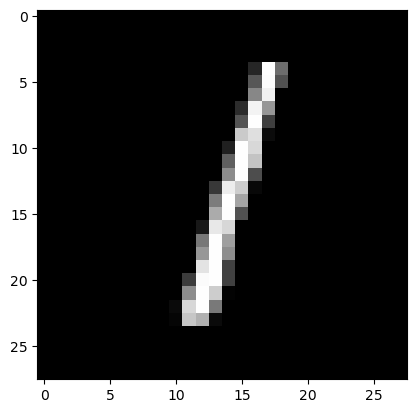

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Tahmin Edilen Etiket: 1


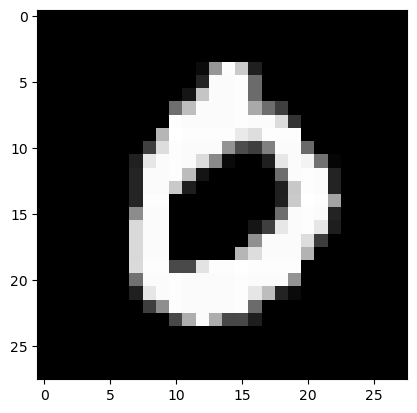

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tahmin Edilen Etiket: 0


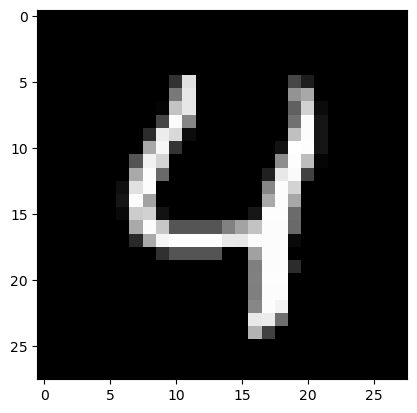

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Tahmin Edilen Etiket: 4


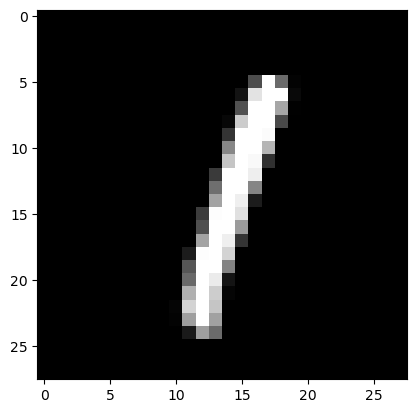

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Tahmin Edilen Etiket: 1


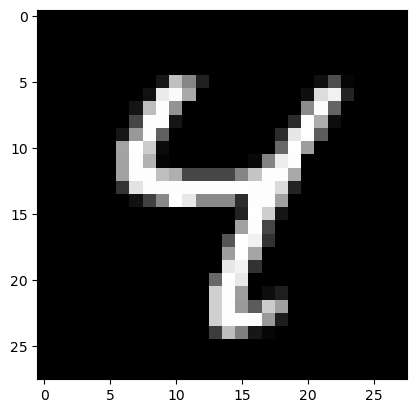

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Tahmin Edilen Etiket: 4


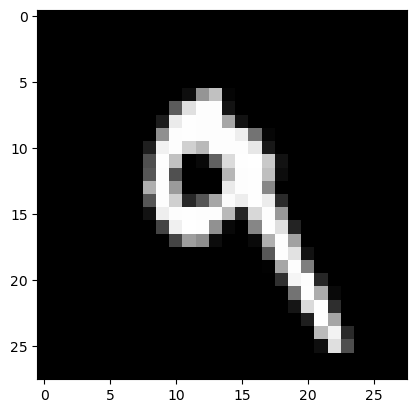

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tahmin Edilen Etiket: 9


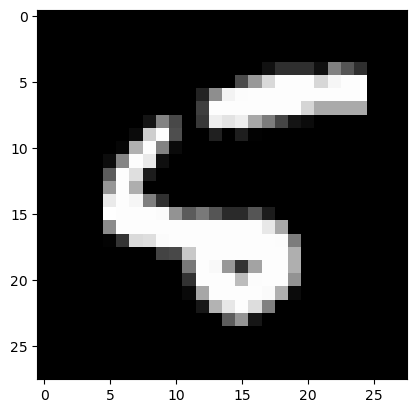

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Tahmin Edilen Etiket: 5


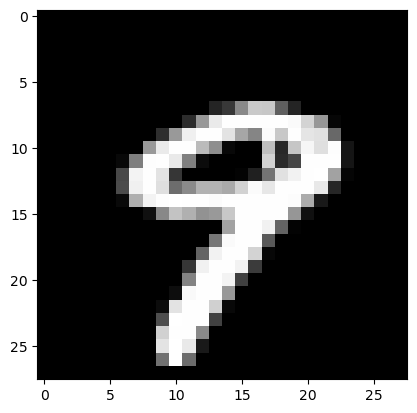

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tahmin Edilen Etiket: 9


In [36]:
for index in range(10):
    plt.imshow(x_test[index], cmap='gray')
    plt.show()

    prediction = model.predict(x_test[index:index+1])
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
    print("Tahmin Edilen Etiket:", predicted_label)